This code gives an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

Replace 'XLABEL' and 'YLABEL' with the respective labels in your data set.

# Problem description
Enter in the text cell below the clustering problem that you're about to work on. 

What is your X and Y label?

number_of_reviews & price

Import packages

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


Import and explore the data set

In [8]:
df = pd.read_csv('originalfile.csv')

2. Display columns and describe the data set

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Scatter plot

Text(0, 0.5, 'price')

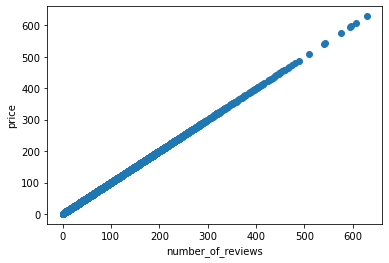

In [16]:
plt.scatter(df.number_of_reviews,df['number_of_reviews'])
plt.xlabel('number_of_reviews')
plt.ylabel('price')

Fit and predict three clusters for the data

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['number_of_reviews','price']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
df['cluster']=y_predicted
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


In [19]:
km.cluster_centers_

array([[2.35372168e+01, 1.31888861e+02],
       [1.95348837e+00, 5.84586047e+03],
       [1.10825496e+01, 9.39486938e+02]])

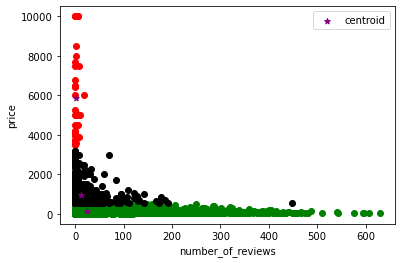

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.number_of_reviews,df1['price'],color='green')
plt.scatter(df2.number_of_reviews,df2['price'],color='red')
plt.scatter(df3.number_of_reviews,df3['price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.legend()

Fit the model using MinMaxScaler()

In [23]:
scaler = MinMaxScaler()

scaler.fit(df[['price']])
df['price'] = scaler.transform(df[['price']])

scaler.fit(df[['number_of_reviews']])
df['number_of_reviews'] = scaler.transform(df[['number_of_reviews']])

In [10]:
plt.scatter(df.XLABEL,df['price'])

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['number_of_reviews','price']])
y_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
df['cluster']=y_predicted
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.0149,1,0.014308,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.0225,1,0.071542,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,0.0150,3,0.000000,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.0089,1,0.429253,2019-07-05,4.64,1,194,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,0.0080,10,0.014308,2018-11-19,0.10,1,0,0


In [26]:
km.cluster_centers_

array([[0.01240456, 0.01572726],
       [0.12598791, 0.01308507],
       [0.33186403, 0.01212261]])

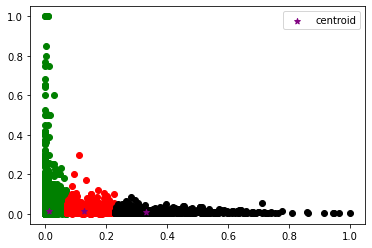

In [28]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.number_of_reviews,df1['price'],color='green')
plt.scatter(df2.number_of_reviews,df2['price'],color='red')
plt.scatter(df3.number_of_reviews,df3['price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['number_of_reviews','price']])
    sse.append(km.inertia_)

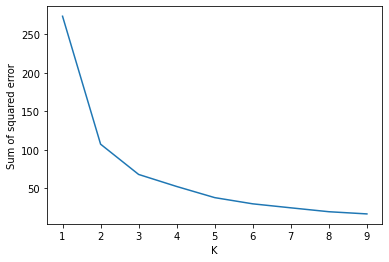

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)